In [82]:
#load necessary modukes
import pandas as pd
import numpy as np
import os

In [114]:
# ML Models
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [116]:
# For plotting
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [117]:
#read the data from csv file
vehicle_df = pd.read_csv("vehicle.csv")
vehicle_df.head(3)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car

### 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [118]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

All the 18 independent columns are of numeric type, the Target column is of type string. 

In [119]:
#Count the Target class variable
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

There are more number of records for car. Bus and Van records are less than half of number of car records

Lets convert the car, bus and van to a equavalent numeric value.

In [120]:
vehicle_df['class']=vehicle_df['class'].map({'car':1,'bus':2,'van':3})

In [121]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    1.728132    0.818044    1.0    1.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    2.0     3.0

The mean and median values match for most of the columns. The mean values slightly moves away from median for distance_circularity,scatter_ratio,elongatedness, scaled_variance,scaled_variance.1 and hollows_ratio. This indicates there could be outliers and skew the distribution.

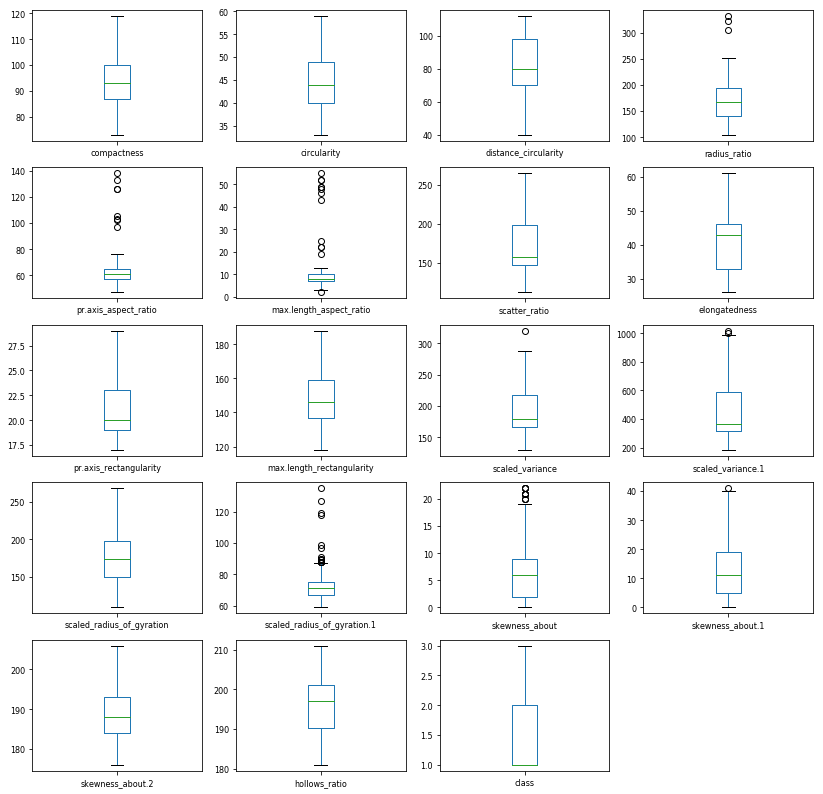

In [122]:
vehicle_df.plot(kind='box', subplots=True, layout=(5,4), fontsize=8, figsize=(14,14))
plt.show()

There are outliers in radius_ratio, pr.axis_aspect_ratio, max_length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about and skewness_about.1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

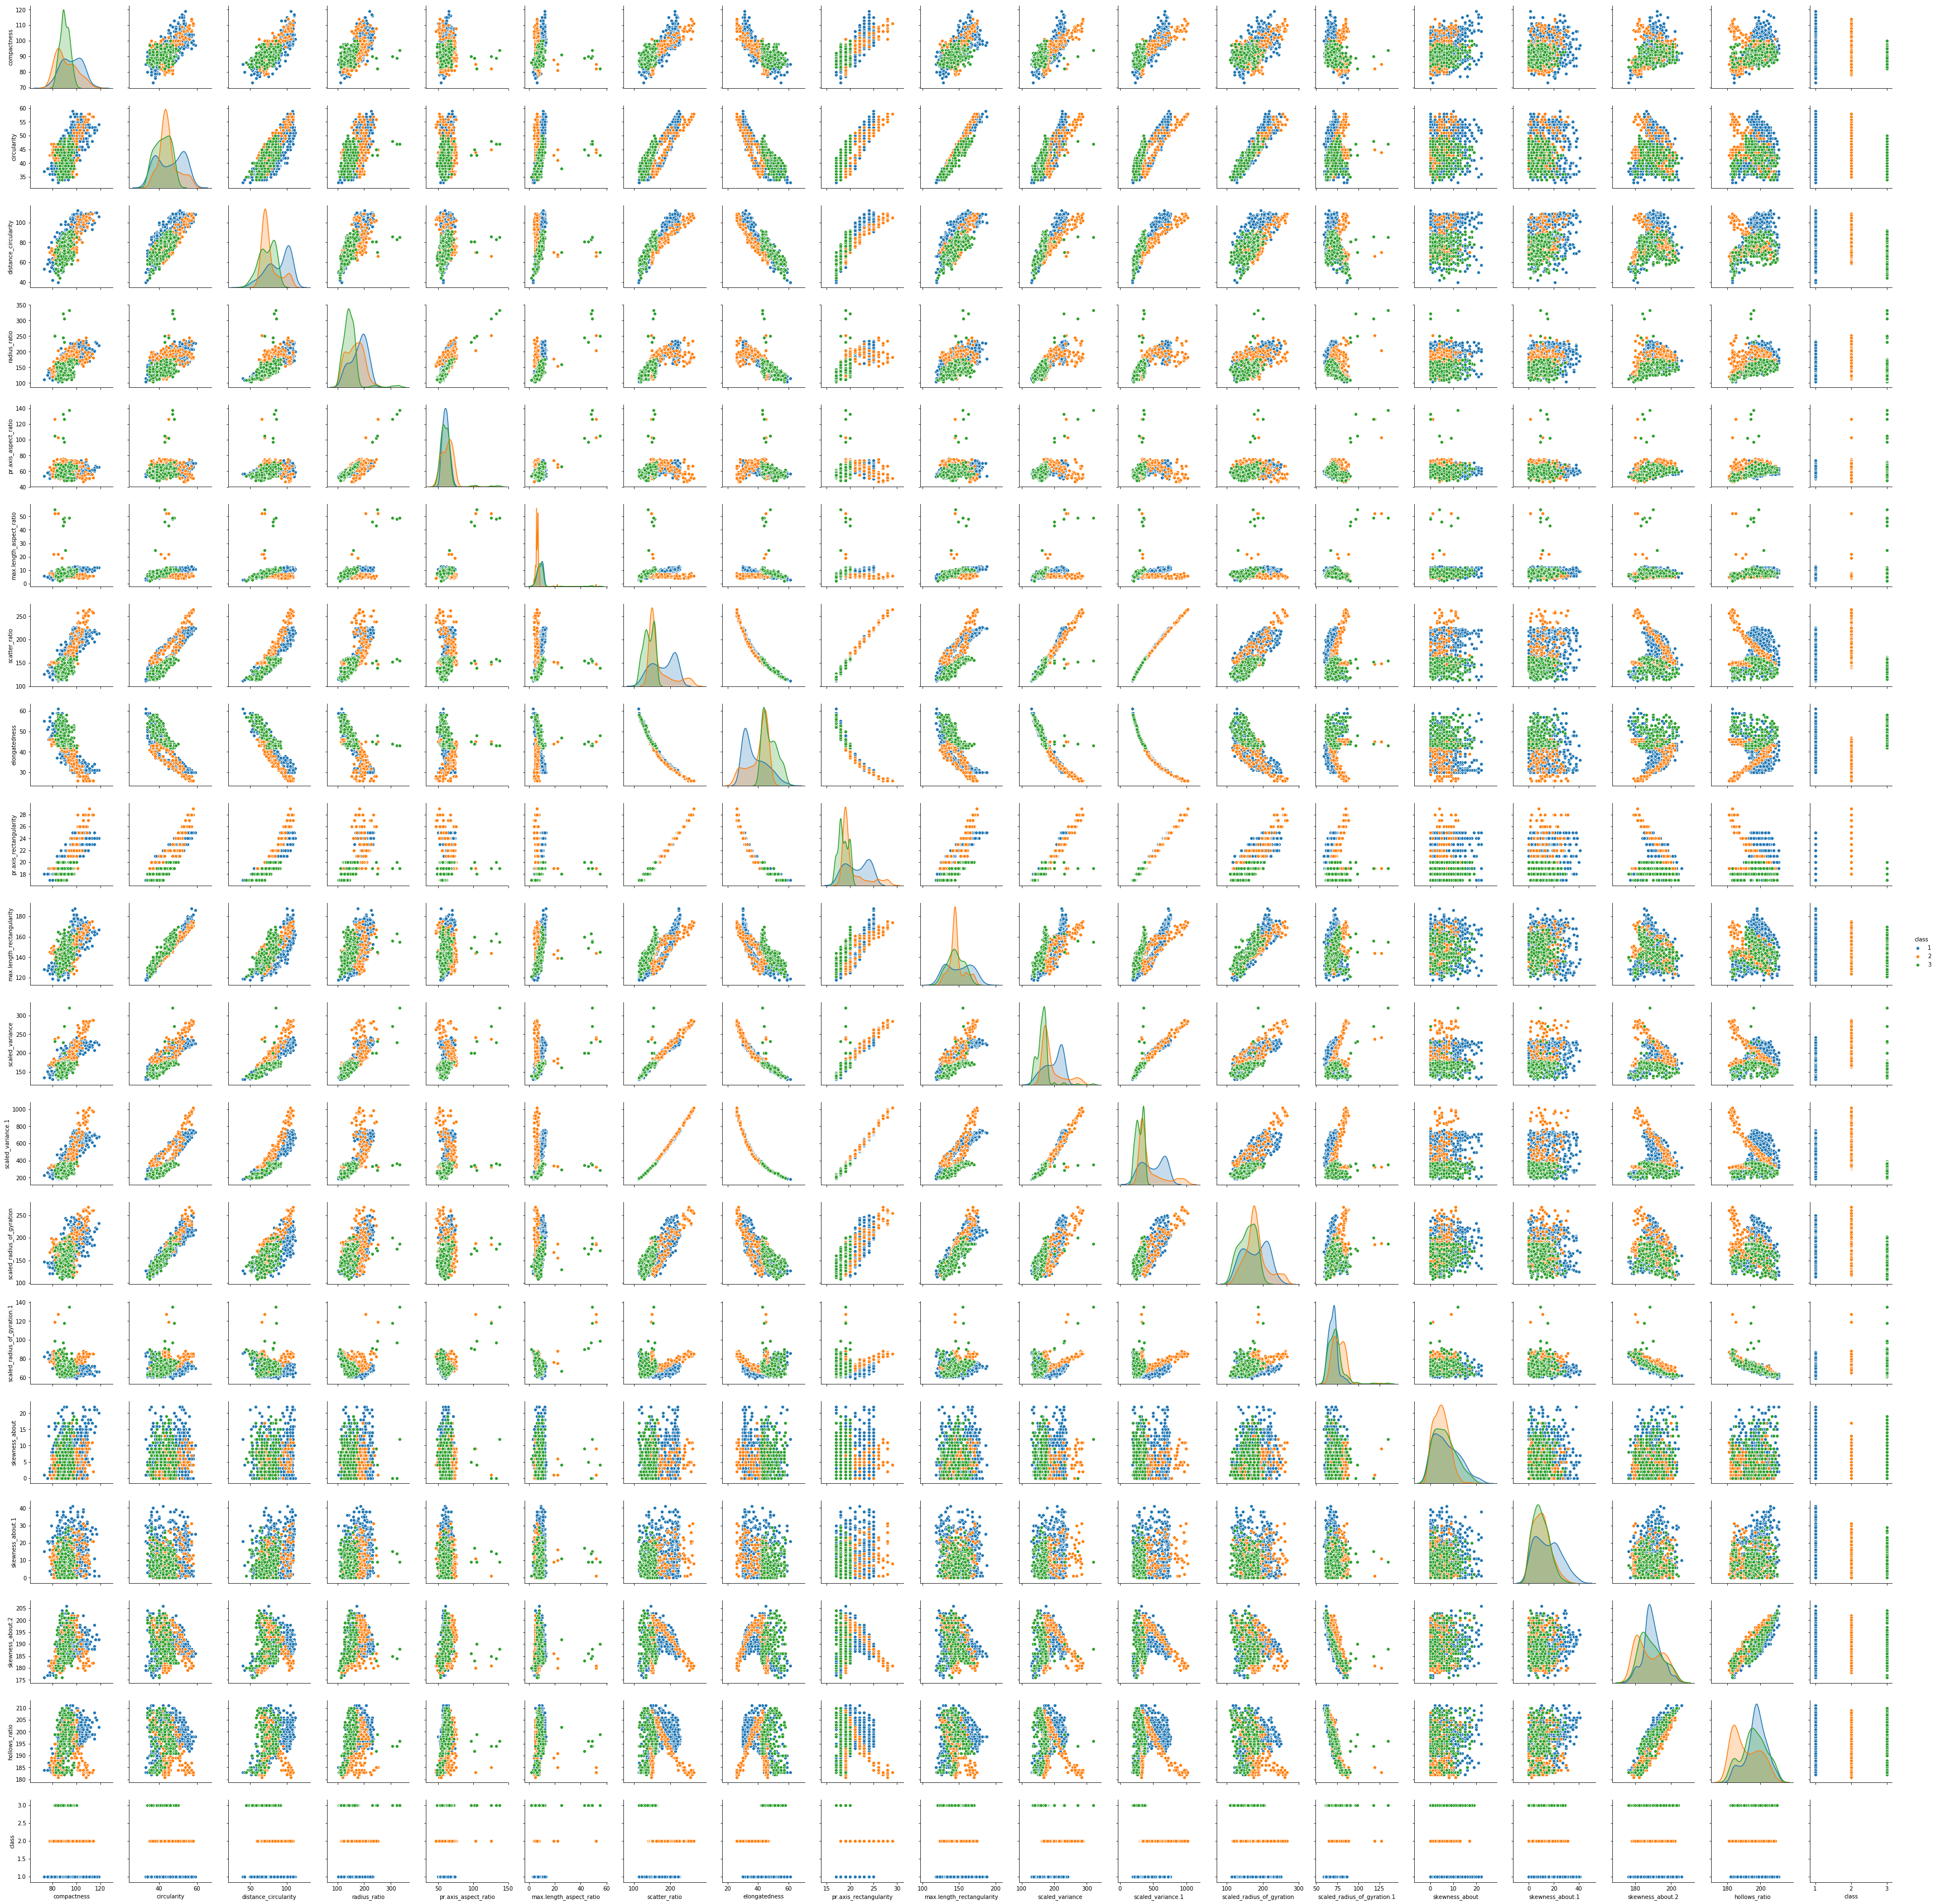

In [123]:
sns.pairplot(vehicle_df, diag_kind='kde', hue='class')

1. From the pair plot we clearly get to know that there are 3 category for vechicles. 
2. Also Multi Colinearity exit in this dataset. The Independent attributes are having good corelation among themself.This will lead to model to be very sensitive to change in the independent variables.
3. Multiple gausian exist in several columns. Hence we donot know if the data was collected in same process.
4. The cental values overlap for bus and Van in most of the attributes.

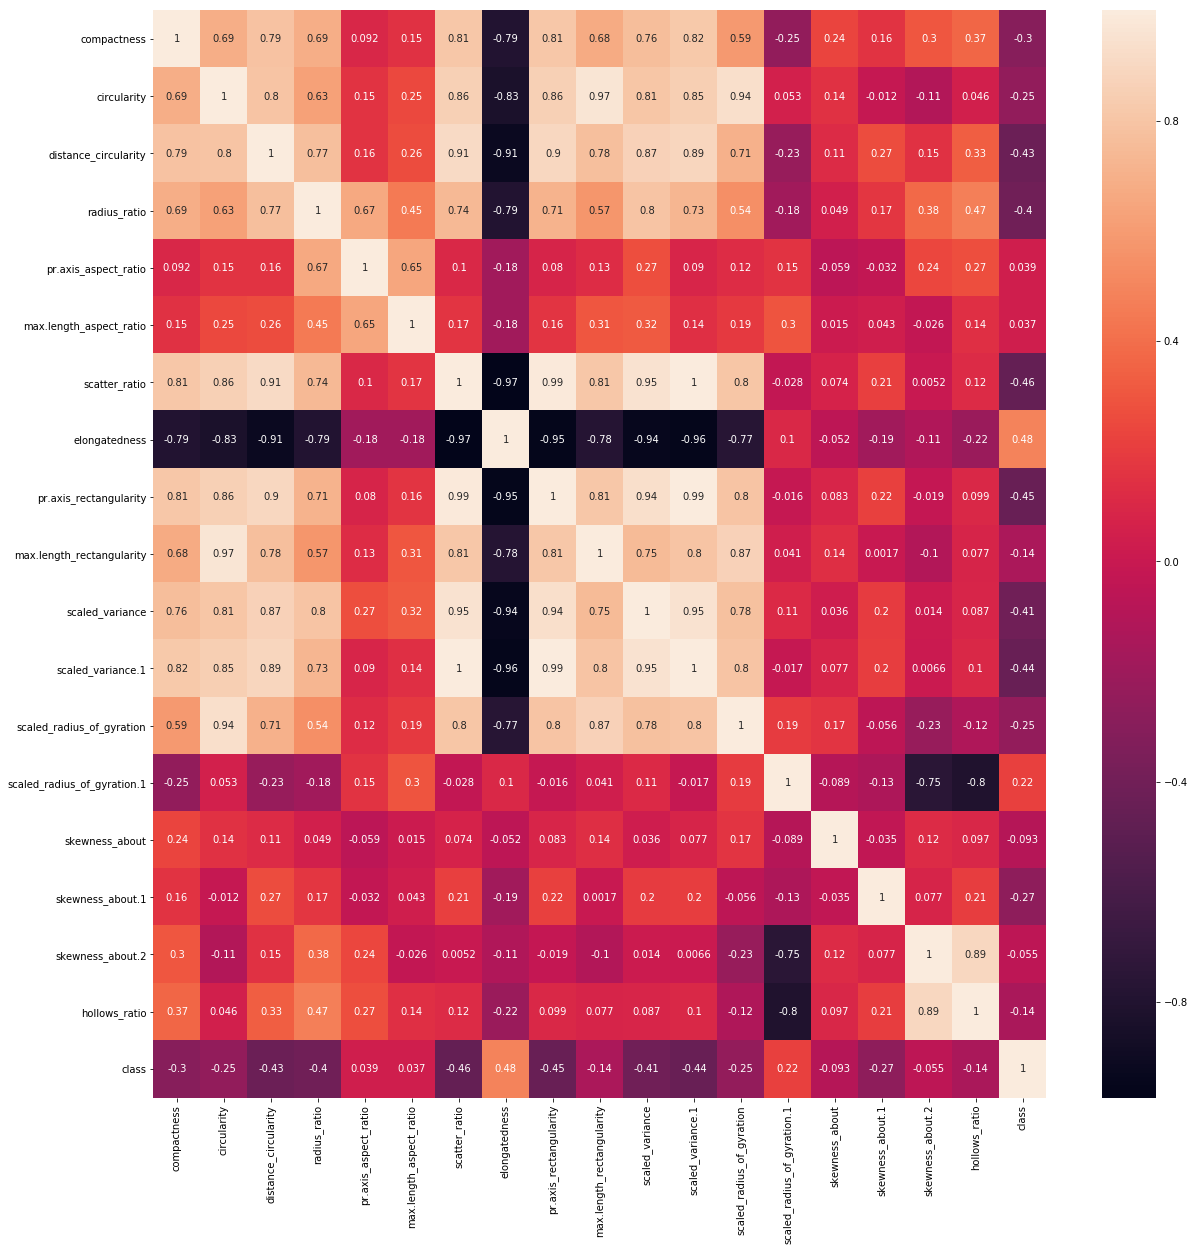

In [124]:
corrmat = vehicle_df.corr()
plt.subplots(figsize = (20,20))
sns.heatmap(corrmat, annot=True)

From the heat map, we can see that most of the attributes have negative co relation with target variable. Also the variables have low corelation with target variable. Elongatedness have good corelation with other independent attributes.  

Check for Missing values

In [125]:
vehicle_df.isna().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [126]:
vehicle_df.mean()

compactness                     93.678487
circularity                     44.828775
distance_circularity            82.110451
radius_ratio                   168.888095
pr.axis_aspect_ratio            61.678910
max.length_aspect_ratio          8.567376
scatter_ratio                  168.901775
elongatedness                   40.933728
pr.axis_rectangularity          20.582444
max.length_rectangularity      147.998818
scaled_variance                188.631079
scaled_variance.1              439.494076
scaled_radius_of_gyration      174.709716
scaled_radius_of_gyration.1     72.447743
skewness_about                   6.364286
skewness_about.1                12.602367
skewness_about.2               188.919527
hollows_ratio                  195.632388
class                            1.728132
dtype: float64

In [127]:
#fill the missing value with mean as the value of those colummns are all continous variables.
vehicle_df = vehicle_df.fillna(vehicle_df.mean())

In [128]:
vehicle_df.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [129]:
vehicle_df[vehicle_df=='?'].count()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

All the missing values are removed.

Will replace outliers with median of that column

In [133]:
# A simple function that takes as input a column, find's its median, identifies outliers, replaces outliers with median     
def replace(x):
    median, std = x.median(), x.std()  #Get the median and the standard deviation of every column
    outliers = (x - median).abs() > 2*std # Subtract median from every member of each column. Take absolute values > 2std
    x[outliers] = x.median()       
    return x

vehicle_df_corrected = vehicle_df.iloc[:,0:18].apply(lambda x:x.transform(replace)) # transforming raw data using replace function
vehicle_df_treated = vehicle_df_corrected.join(pd.DataFrame(vehicle_df['class']))  # joining back the target column

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

### 2.  Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

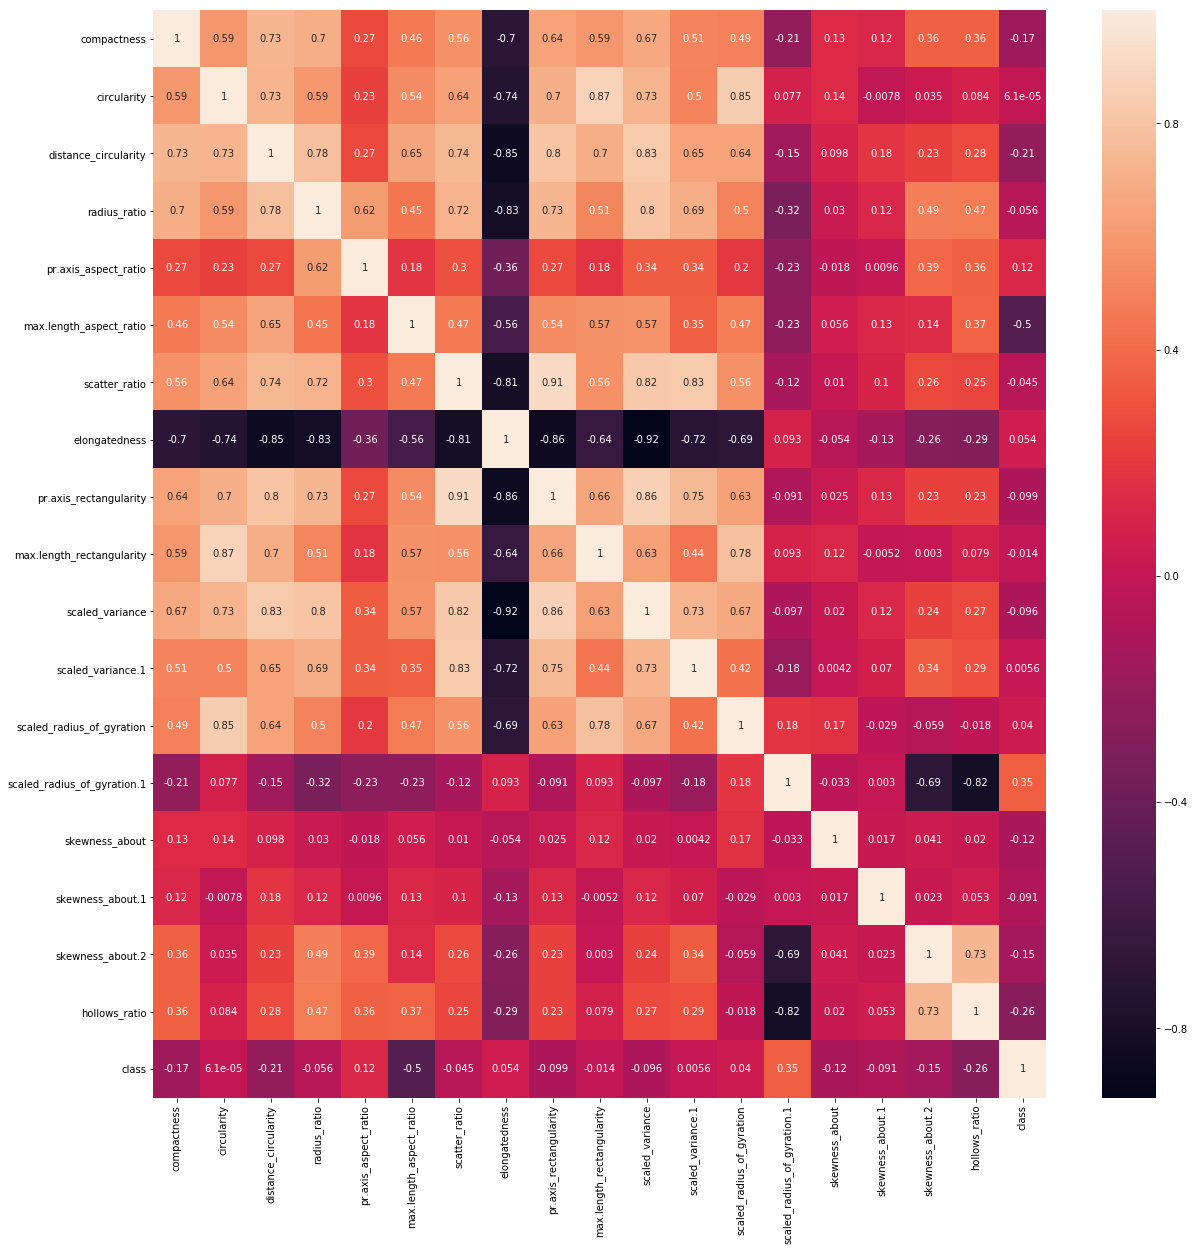

In [135]:
corrmat = vehicle_df_treated.corr()
plt.subplots(figsize = (20,20))
sns.heatmap(corrmat, annot=True)

1. elongatedness, have high corelation with most of the variables. Hence i will consider including it and eliminatng other features.
2. circularity compared to compactness, distance_circularity, radius_ratio and compactness have less corelation with other attributes. Hence will choose this feature.
3. pr.axis_aspect_ratio, max.length_aspect_ratio,scaled_variance,scaled_variance.1,scaled_radius_of_gyration.1, skewness_about, skewness_about.2 has less corelation with other independent variables hance will choose these feature.
4. The most of the feature does not have a high corelation with target variables. max.length_aspect_ratio which i have choosen have negative medium level corelation with target variable.

Hence i will be choosing 
'circularity', 
'pr.axis_aspect_ratio', 
'max.length_aspect_ratio', 
'elongatedness', 
'scaled_variance', 
'scaled_variance.1', 
'scaled_radius_of_gyration.1', 
'skewness_about', 
'skewness_about.2' and
class for analysis

In [150]:
reduced_df = inliers[['circularity', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'elongatedness', 'scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.2','class']]

### 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [151]:
X = reduced_df.iloc[:,0:9]
Y = reduced_df['class']

In [152]:
X_train_sd = StandardScaler().fit_transform(X)

In [153]:
#get co variance matrix
train_cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00157729  0.20800397  0.56944142 -0.77223338  0.76515534  0.80068847
  -0.0124952   0.17056522 -0.03518797]
 [ 0.20800397  1.00157729  0.03192611 -0.35818104  0.30617107  0.27261936
  -0.32822881 -0.04804656  0.46323883]
 [ 0.56944142  0.03192611  1.00157729 -0.48930894  0.46603349  0.52121326
  -0.28513556  0.09602232  0.00510014]
 [-0.77223338 -0.35818104 -0.48930894  1.00157729 -0.97527031 -0.96890382
   0.20704746 -0.07795225 -0.24131406]
 [ 0.76515534  0.30617107  0.46603349 -0.97527031  1.00157729  0.97198397
  -0.15854244  0.06339496  0.19113457]
 [ 0.80068847  0.27261936  0.52121326 -0.96890382  0.97198397  1.00157729
  -0.16416151  0.08895964  0.16568872]
 [-0.0124952  -0.32822881 -0.28513556  0.20704746 -0.15854244 -0.16416151
   1.00157729 -0.05562232 -0.82217952]
 [ 0.17056522 -0.04804656  0.09602232 -0.07795225  0.06339496  0.08895964
  -0.05562232  1.00157729  0.07795014]
 [-0.03518797  0.46323883  0.00510014 -0.24131406  0.19113457  0.16568872


In [154]:
#get Eigen vector and Eigen values
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.40571871  0.2479443  -0.05771265  0.03638632 -0.18735871 -0.85502409
   0.00445915 -0.04904828  0.02580983]
 [ 0.20234148 -0.36611813  0.35348325  0.44395718 -0.69034321  0.13410558
  -0.07536418  0.0437909   0.02848843]
 [ 0.3032009   0.11049165 -0.28165578 -0.63404837 -0.49854666  0.28011503
   0.29398745 -0.00755405  0.03185301]
 [-0.46823279 -0.06530392 -0.10591127 -0.09410306 -0.19843721 -0.20170678
  -0.00153819  0.47784787  0.66934069]
 [ 0.45969621  0.10473256  0.11928094  0.09452899  0.26159851  0.22676807
  -0.05500481 -0.31069008  0.73152951]
 [ 0.46448147  0.12559029  0.06934947  0.04706112  0.22265396  0.15457221
  -0.09453664  0.81593335 -0.11536107]
 [-0.16606963  0.59209784  0.19649016  0.35556417 -0.08051886  0.11345192
   0.65995354  0.04361277  0.00337378]
 [ 0.06727454  0.01109541 -0.84833243  0.50261109 -0.06782616  0.12904844
  -0.04131214 -0.00649947  0.0078987 ]
 [ 0.15527041 -0.64075217 -0.06211344  0.02260685  0.26702926 -0.1641898
   0.

In [155]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(4.225628896099659, array([ 0.40571871,  0.20234148,  0.3032009 , -0.46823279,  0.45969621,
        0.46448147, -0.16606963,  0.06727454,  0.15527041])), (1.9490909619698968, array([ 0.2479443 , -0.36611813,  0.11049165, -0.06530392,  0.10473256,
        0.12559029,  0.59209784,  0.01109541, -0.64075217])), (1.0577539945788361, array([-0.05771265,  0.35348325, -0.28165578, -0.10591127,  0.11928094,
        0.06934947,  0.19649016, -0.84833243, -0.06211344])), (0.8493571576620815, array([ 0.03638632,  0.44395718, -0.63404837, -0.09410306,  0.09452899,
        0.04706112,  0.35556417,  0.50261109,  0.02260685])), (0.5519924239252615, array([-0.18735871, -0.69034321, -0.49854666, -0.19843721,  0.26159851,
        0.22265396, -0.08051886, -0.06782616,  0.26702926])), (0.22169707502342845, array([-0.85502409,  0.13410558,  0.28011503, -0.20170678,  0.22676807,
        0.15457221,  0.11345192,  0.12904844, -0.1641898 ])), (0.10796393050220923, array([ 0.00445915, -0.07536418,  0.29398745, -

In [156]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 9 entries with 9 th entry 
# cumulative reaching almost 100%

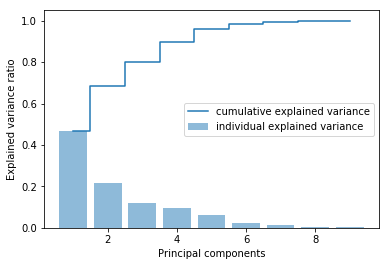

In [157]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [158]:
#reducing 9 dimension to 5 dimension
P_reduce = np.array(train_eigvectors_sorted[0:5]) 
X_std_5D = np.dot(X_train_sd,P_reduce.T)
vechile_5df = pd.DataFrame(X_std_5D)

In [159]:
vechile_5df.head(3)

0         1         2         3         4
0  0.594959 -0.533956  0.150768  0.098752 -2.146217
1 -1.058838 -0.033326 -1.249559 -0.387535  0.005206
2  2.959474  0.685860 -1.313726  1.206920 -0.429842

In [160]:
X_train, X_test, y_train, y_test = train_test_split(vechile_5df, Y, test_size=0.30, random_state=10)

### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [161]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [162]:
y_pred = svclassifier.predict(X_test)  

In [165]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[79  6  7]
 [ 5 50  0]
 [ 1  1 42]]
             precision    recall  f1-score   support

          1       0.93      0.86      0.89        92
          2       0.88      0.91      0.89        55
          3       0.86      0.95      0.90        44

avg / total       0.90      0.90      0.90       191



In [166]:
svcRbfclassifier = SVC(kernel='rbf')  
svcRbfclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [167]:
y_pred = svcRbfclassifier.predict(X_test)  

In [168]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[85  4  3]
 [ 0 55  0]
 [ 6  0 38]]
             precision    recall  f1-score   support

          1       0.93      0.92      0.93        92
          2       0.93      1.00      0.96        55
          3       0.93      0.86      0.89        44

avg / total       0.93      0.93      0.93       191



SVC model with RBF kernel is giving better accuracy and precision score

Will use grid search to find best hyper parameter for SVC

In [169]:
model = SVC()
#Hyper Parameters Set
params = {'C':[0.01, 0.05, 0.5, 1],
          'kernel': ['linear','rbf']}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Train the model
model1.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
## Evaluation
# Accuracy
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
# Confusion Metrix 
print("Confusion Metrix:   \n", metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.9319371727748691
Confusion Metrix:   
 [[85  0  6]
 [ 4 55  0]
 [ 3  0 38]]


The best hyper parameters are C = 1 and kernel = rbf.